## Q1: Nominal, Ordinal, Interval, Ratio

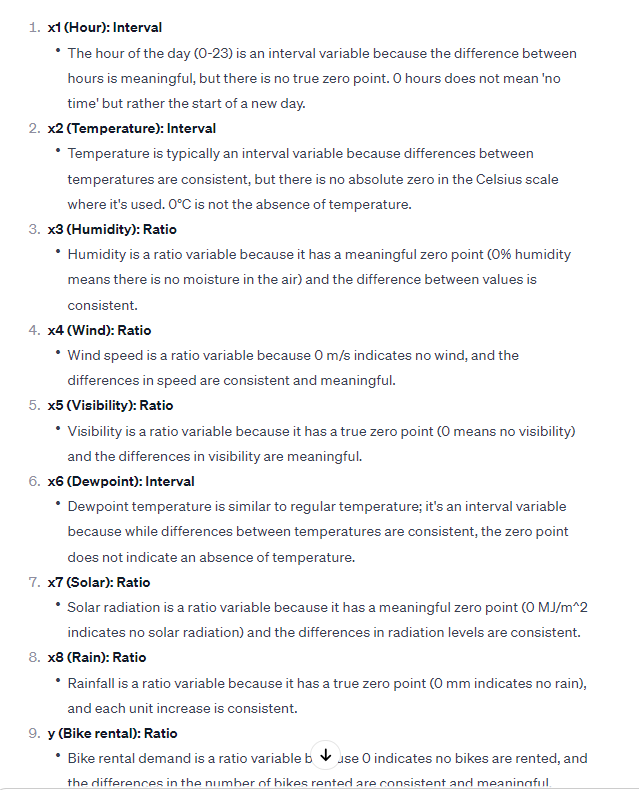

## Q3: Loadings PCA - Positive Negative projection - High Low 

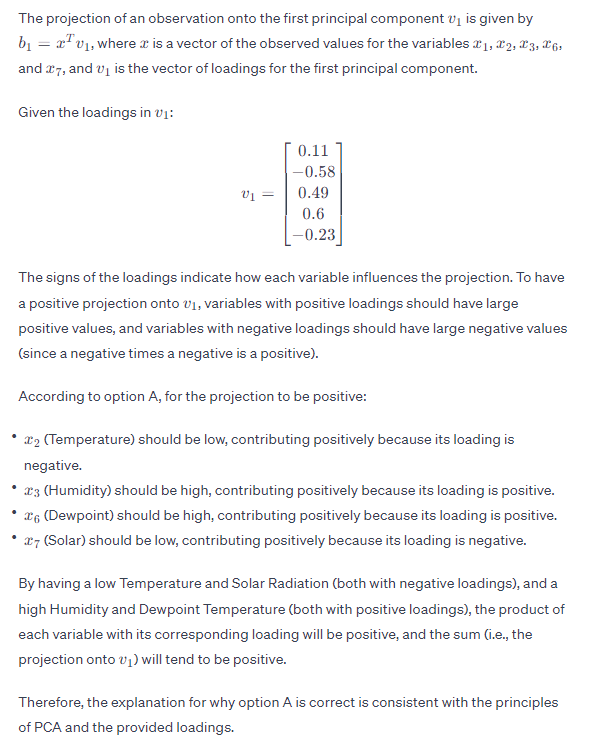

## Q$: Principal component vectors - PCA from data matrix - mean given
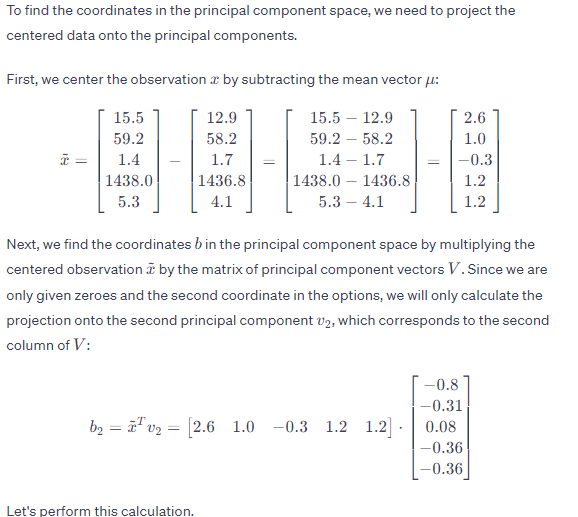

In [1]:
import numpy as np

# Centered data
x_centered = np.array([2.6, 1.0, -0.3, 1.2, 1.2])

# Principal component vector for v2
v2 = np.array([-0.8, -0.31, 0.08, -0.36, -0.36])

# Projection onto the second principal component
b2 = np.dot(x_centered, v2)
b2


-3.278

## Q5: Empirical correlation from empirical covariance matrix
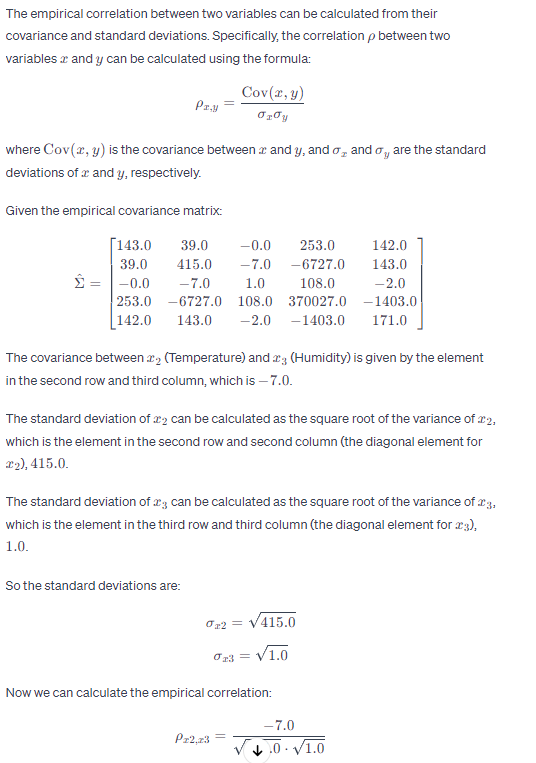

In [3]:
# Empirical covariance matrix
empirical_covariance_matrix = np.array([
    [143.0, 39.0, -0.0, 253.0, 142.0],
    [39.0, 415.0, -7.0, -6727.0, 143.0],
    [-0.0, -7.0, 1.0, 108.0, -2.0],
    [253.0, -6727.0, 108.0, 370027.0, -1403.0],
    [142.0, 143.0, -2.0, -1403.0, 171.0]
])

# Extracting the covariance between x2 and x3
cov_x2_x3 = empirical_covariance_matrix[1, 2]

# Extracting the variances of x2 and x3
var_x2 = empirical_covariance_matrix[1, 1]
var_x3 = empirical_covariance_matrix[2, 2]

# Calculating the standard deviations
std_x2 = np.sqrt(var_x2)
std_x3 = np.sqrt(var_x3)

# Calculating the empirical correlation between x2 and x3
correlation_x2_x3 = cov_x2_x3 / (std_x2 * std_x3)
correlation_x2_x3


-0.3436164855716712

## Variance, Covariance Matrix, Standard deviation 

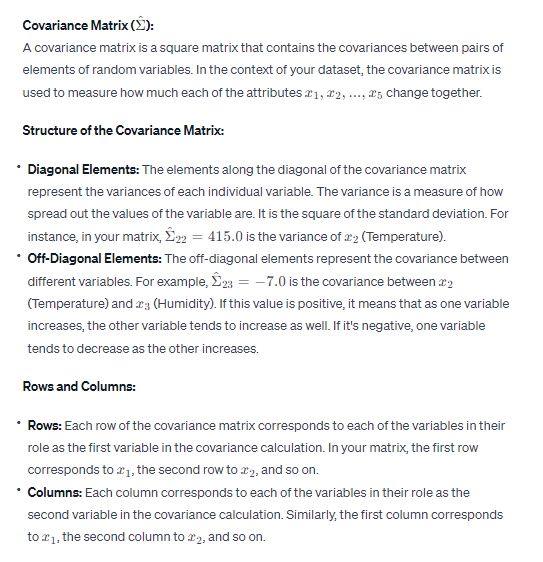
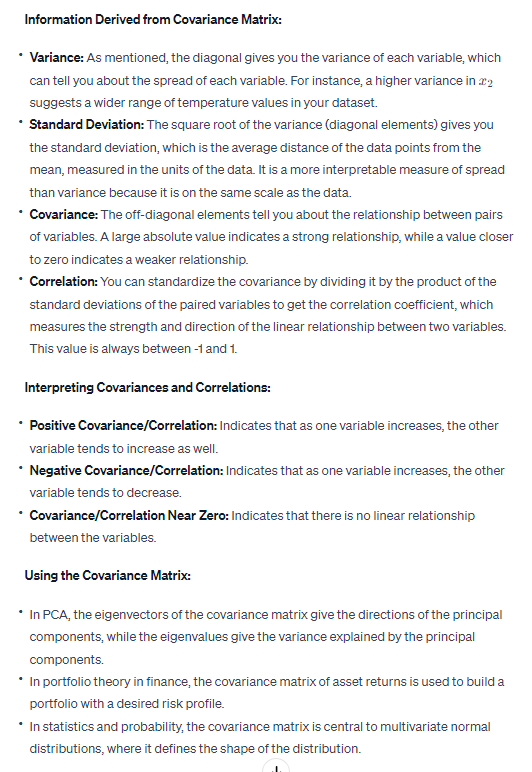
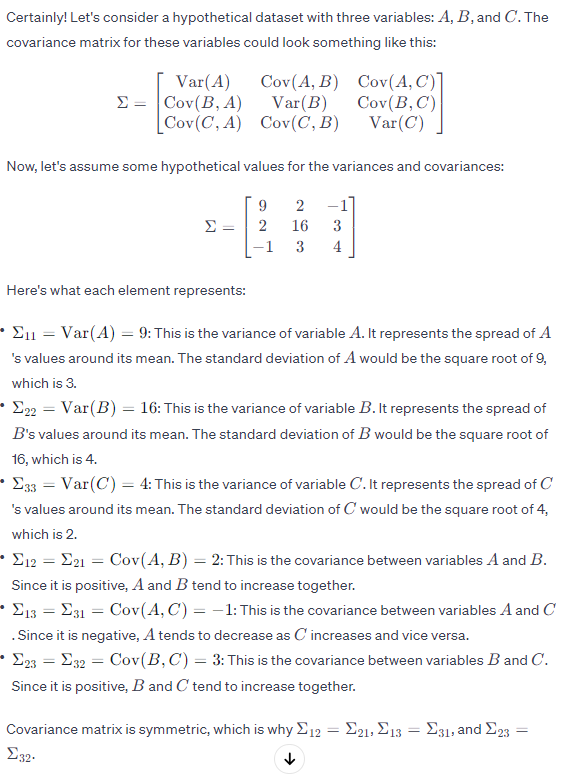

## Q: Dendogram clustering

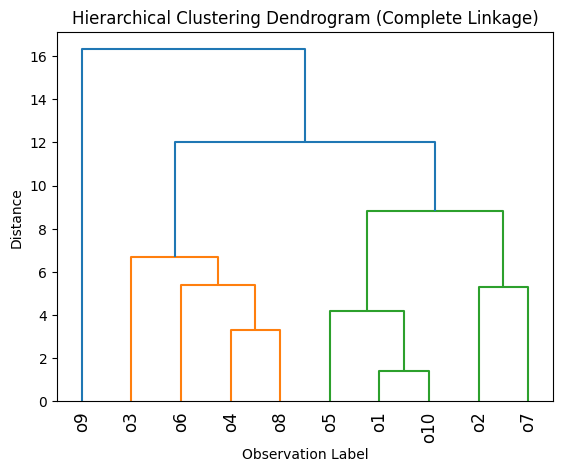

In [1]:
import numpy as np
from scipy.cluster.hierarchy import complete, dendrogram, average
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Define the distance matrix
distance_matrix = np.array([
    [0.0, 5.0, 7.7, 6.1, 4.2, 11.0, 7.3, 9.0, 11.3, 1.4],
    [5.0, 0.0, 5.4, 4.0, 7.5, 7.9, 5.3, 6.8, 11.9, 3.5],
    [7.7, 5.4, 0.0, 5.2, 7.2, 6.1, 7.8, 6.7, 12.9, 6.4],
    [6.1, 4.0, 5.2, 0.0, 5.1, 5.4, 8.4, 3.3, 8.1, 4.8],
    [4.2, 7.5, 7.2, 5.1, 0.0, 8.7, 8.8, 6.6, 7.7, 4.1],
    [11.0, 7.9, 6.1, 5.4, 8.7, 0.0, 12.0, 4.2, 9.3, 9.8],
    [7.3, 5.3, 7.8, 8.4, 8.8, 12.0, 0.0, 11.0, 16.3, 6.7],
    [9.0, 6.8, 6.7, 3.3, 6.6, 4.2, 11.0, 0.0, 6.2, 7.8],
    [11.3, 11.9, 12.9, 8.1, 7.7, 9.3, 16.3, 6.2, 0.0, 10.4],
    [1.4, 3.5, 6.4, 4.8, 4.1, 9.8, 6.7, 7.8, 10.4, 0.0]
])


# Condense the distance matrix to the format required by the complete (Maximum) linkage function
condensed_dist_matrix = squareform(distance_matrix, checks=False)

# Perform complete linkage hierarchical clustering
linked = complete(condensed_dist_matrix)

# Plot the dendrogram
dendrogram(linked,
           labels=['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10'],
           leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Observation Label')
plt.ylabel('Distance')
plt.show()


## Jaccard similarity - vectors of M dimension
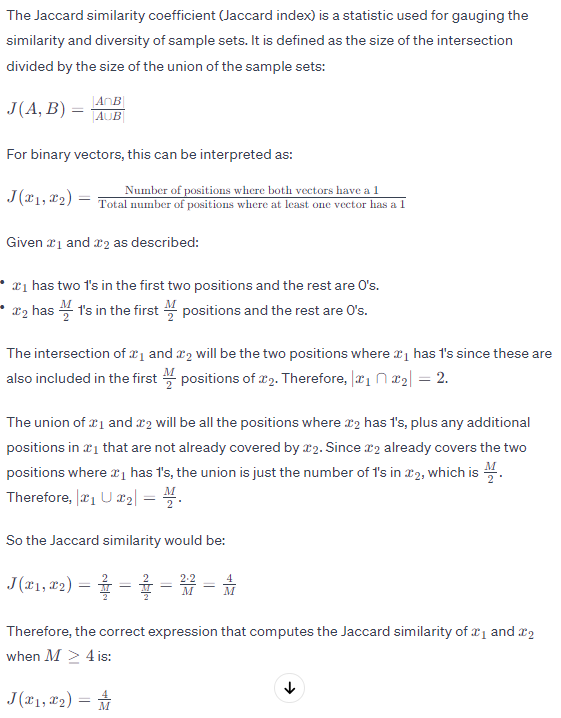

In [5]:
from scipy.spatial.distance import cosine, jaccard

# Binary vectors for each observation - (M = 8 : First two elements of o1 is 1 and M/2 elements of o2 is 1)
o1 = [1, 1, 0, 0, 0, 0, 0, 0]
o2 = [1, 1, 1, 1, 0, 0, 0, 0]
# o3 = [0, 0, 1, 0, 0, 1, 0, 1]
# o4 = [0, 1, 0, 0, 0, 1, 0, 1]
# o1 to o4 taken as per problem, see what you problem asks for

# Compute SMC
def smc(a, b):
    return sum(1 for x, y in zip(a, b) if x == y) / len(a)

# Compute Cosine Similarity
def cos_sim(a, b):
    return 1 - cosine(a, b)

# Compute Jaccard Index
def jaccard_index(a, b):
    return 1 - jaccard(a, b)

# Calculate similarities
# smc_o2_o4 = smc(o2, o4)
# cos_o1_o2 = cos_sim(o1, o2)
# smc_o3_o4 = smc(o3, o4)
j_o2_o4 = jaccard_index(o1, o2)

# print(f"SMC(o2, o4): {smc_o2_o4:.3f}")
# print(f"Cos(o1, o2): {cos_o1_o2:.3f}")
# print(f"SMC(o3, o4): {smc_o3_o4:.3f}")
print(f"J(o2, o4): {j_o2_o4:.3f}")


J(o2, o4): 0.500


## Q11: Naive Bayes - Observation based
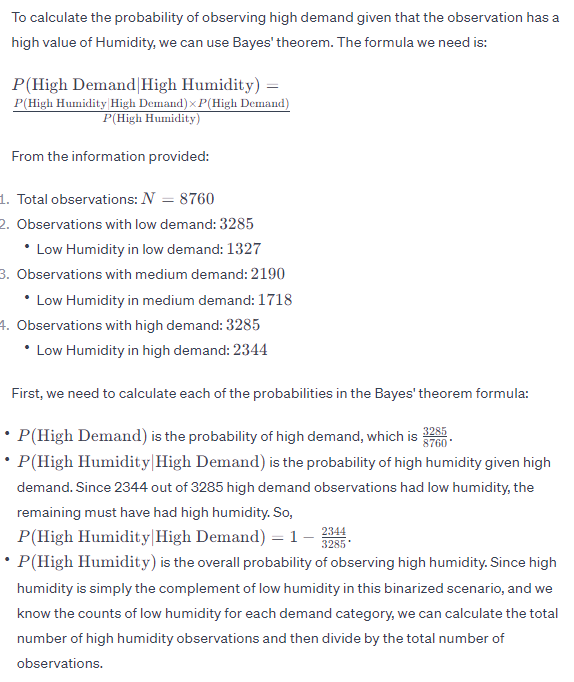

In [8]:
# Re-calculating after execution state reset

# Given values
total_observations = 8760
low_demand = 3285
low_humidity_low_demand = 1327
medium_demand = 2190
low_humidity_medium_demand = 1718
high_demand = 3285
low_humidity_high_demand = 2344

# Probabilities
p_high_demand = high_demand / total_observations
p_high_humidity_given_high_demand = 1 - (low_humidity_high_demand / high_demand)

# Total low humidity observations
total_low_humidity = low_humidity_low_demand + low_humidity_medium_demand + low_humidity_high_demand
# Total high humidity observations
total_high_humidity = total_observations - total_low_humidity
# Probability of high humidity
p_high_humidity = total_high_humidity / total_observations

# Probability of high demand given high humidity
p_high_demand_given_high_humidity = (p_high_humidity_given_high_demand * p_high_demand) / p_high_humidity
p_high_demand_given_high_humidity


0.2791456541085731

## Q12: Market Basket - Support calculation - from itemsets given
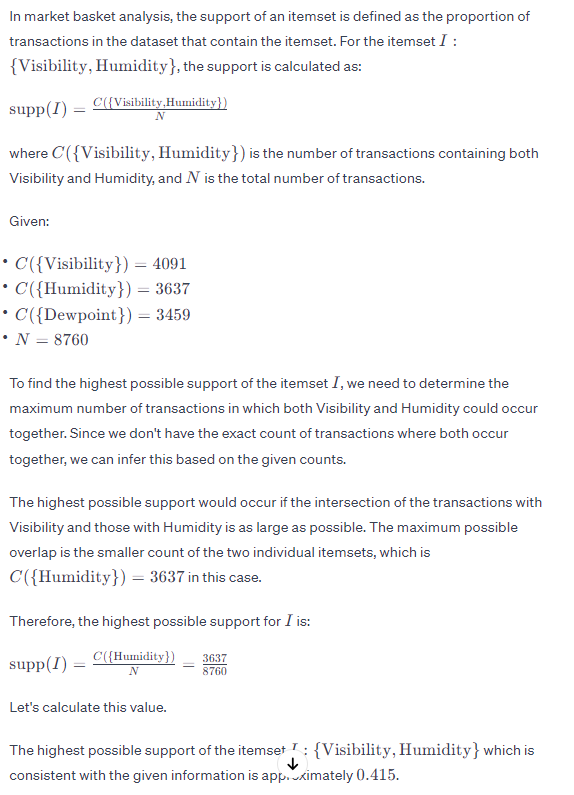
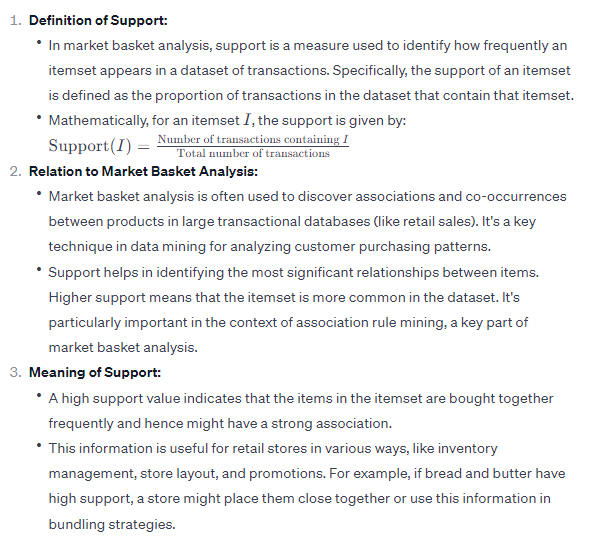
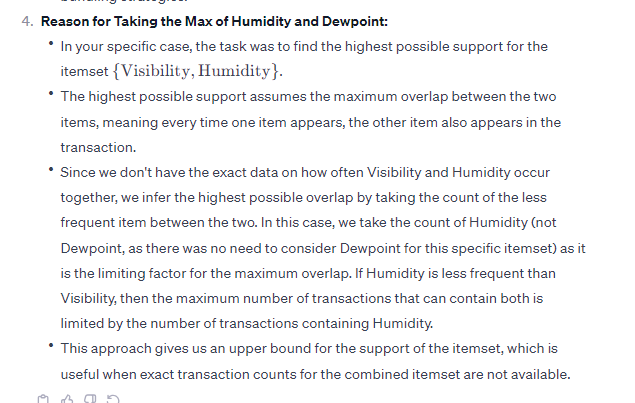

In [9]:
# Calculating the highest possible support for a given itemset in a market basket analysis

# Given data
N = 8760  # Total number of transactions
C_visibility = 4091  # Number of transactions containing Visibility
C_humidity = 3637    # Number of transactions containing Humidity
C_dewpoint = 3459    # Number of transactions containing Dewpoint

# The highest possible support for the itemset {Visibility, Humidity} would be the case
# where every transaction that contains Humidity also contains Visibility.
# This maximum overlap is limited by the smaller of the two counts = minimum of (C_visibility or C_humidity).
# Hence, the highest possible support is given by the count of the smaller itemset (C_humidity) divided by N.

highest_possible_support_I = C_humidity / N

highest_possible_support_I


0.4151826484018265

## Purity Gain - Hunt's Algorithm
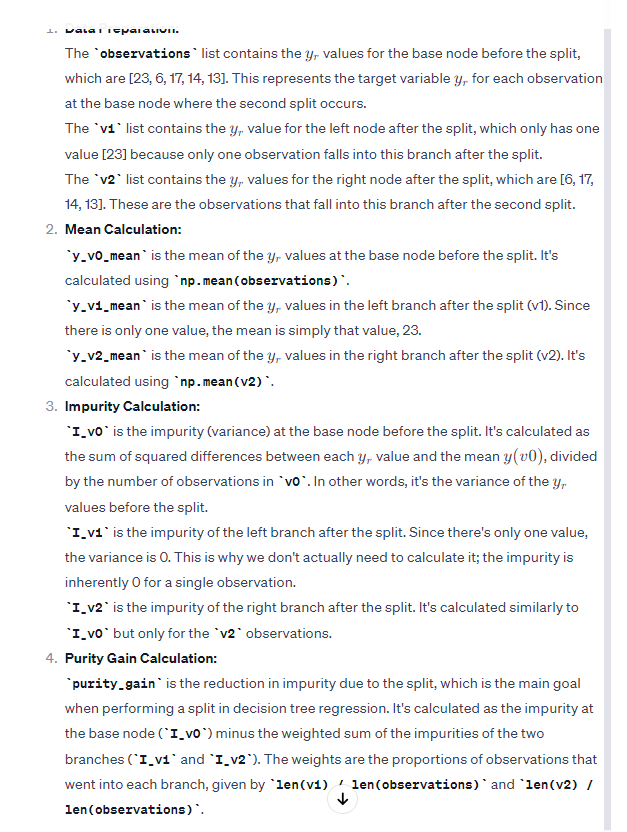

In [13]:
# Given data from the solution
observations = [23, 6, 17, 14, 13]  # y-values at the base node before the split
v1 = [23]                           # y-values in branch 1 after the split
v2 = [6, 17, 14, 13]                # y-values in branch 2 after the split

# Calculate mean y-value for the base node and each branch
y_v0_mean = np.mean(observations)
y_v1_mean = np.mean(v1)
y_v2_mean = np.mean(v2)

# Calculate the impurity (variance) of the base node and each branch
I_v0 = np.sum((observations - y_v0_mean) ** 2) / len(observations)
I_v1 = np.sum((v1 - y_v1_mean) ** 2) / len(v1)
I_v2 = np.sum((v2 - y_v2_mean) ** 2) / len(v2)

# Calculate the purity gain
purity_gain = I_v0 - (len(v1) / len(observations) * I_v1 + len(v2) / len(observations) * I_v2)
purity_gain


17.639999999999997

## Q15: ADA Boost weights calculation
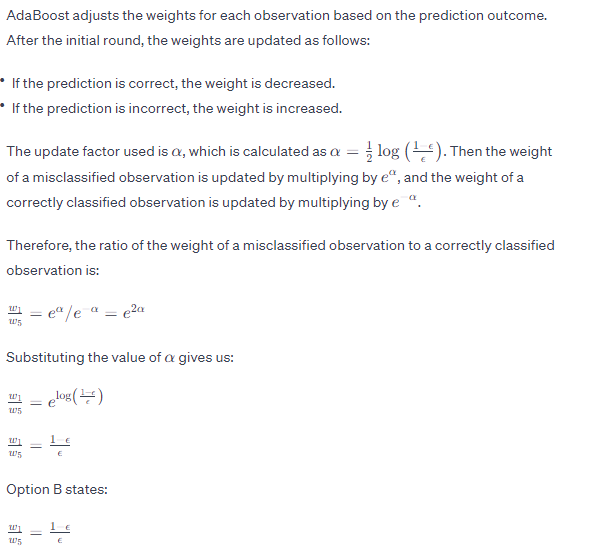
## ADA Lecture note - Page 552
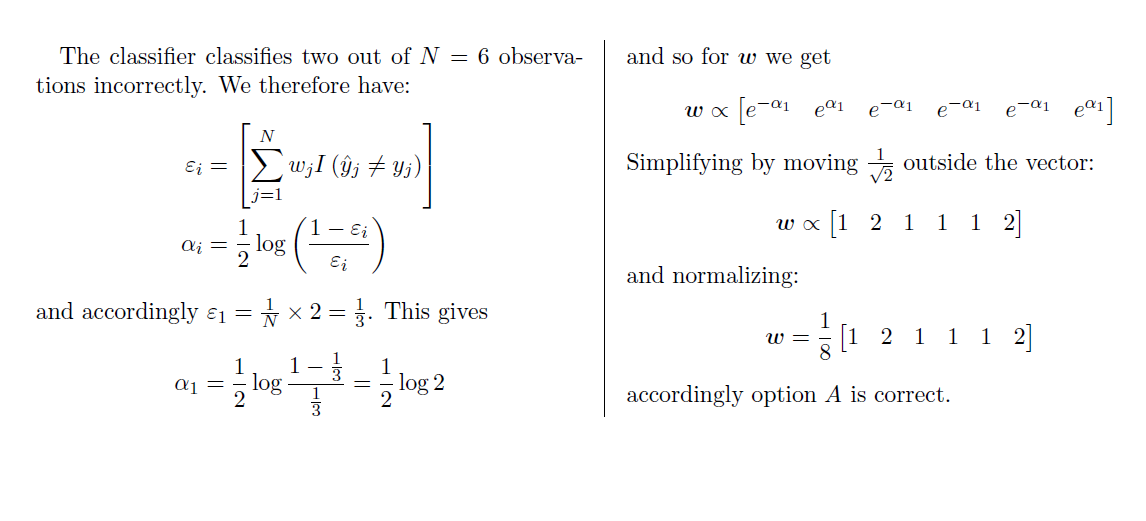

## Q19: Cost Function - Regression
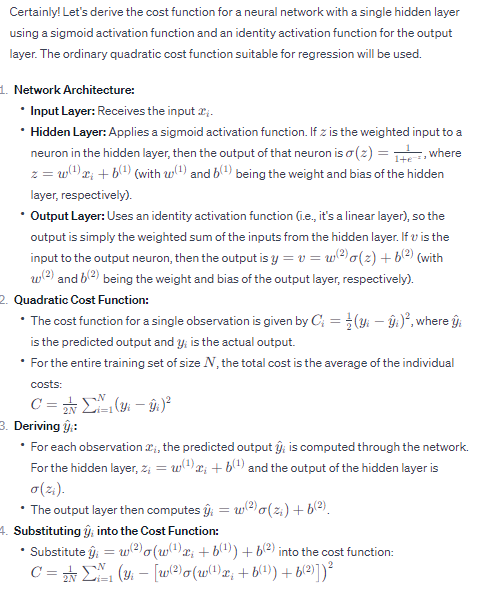

## Q20 + Q21 : Multinomial Regression - Ridge Regression - prediction output - probability of an observation
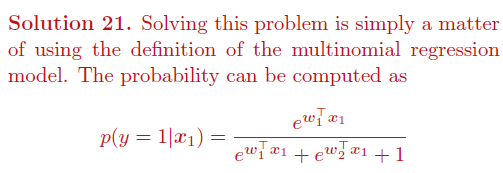
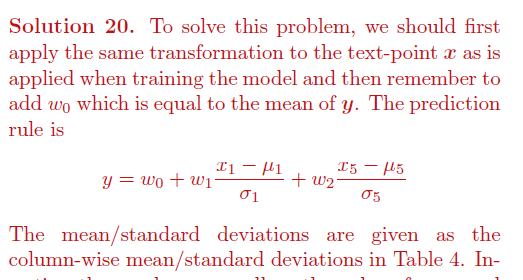

## K means cluster centroid

In [33]:
from sklearn.cluster import KMeans
import numpy as np

# Given data
X = np.array([0, 2, 4, 5, 6, 7, 14]).reshape(-1, 1)
initial_centers = np.array([1, 5, 8]).reshape(-1, 1)

# K-Means algorithm with K=3, initialized with given cluster centers
kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, max_iter=1, random_state=42)
kmeans.fit(X)

# The location of the cluster centers after convergence
converged_centers = kmeans.cluster_centers_
converged_centers.flatten()  # Flatten the array for easier comparison with the given options


array([ 1. ,  5. , 10.5])

## K means centroids center with 'n' iterations 

In [37]:
def run_kmeans(X, initial_centers, num_iterations):
    centroids = initial_centers.copy()
    for _ in range(num_iterations):
        # Step 1: Assign each observation to the closest centroid
        distances = np.sqrt((X - centroids.T) ** 2)  # Calculate distances from each point to each centroid
        assignments = np.argmin(distances, axis=1)  # Find the index (centroid) with minimum distance

        # Step 2: Update the centroid locations to be the mean of assigned observations
        new_centroids = []
        for i in range(len(centroids)):
            assigned_points = X[assignments == i]
            if len(assigned_points) > 0:
                new_centroid = np.mean(assigned_points, axis=0)  # Calculate the mean
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(centroids[i])  # Keep the centroid unchanged if no points assigned
        centroids = np.vstack(new_centroids)
        
    return centroids

# Example usage:
X = np.array([0, 2, 4, 5, 6, 7, 14]).reshape(-1, 1)
initial_centers = np.array([1, 5, 8]).reshape(-1, 1)

# Run k-means for a specific number of iterations
num_iterations = 1  # Change this number based on your requirement
final_centroids = run_kmeans(X, initial_centers, num_iterations)
final_centroids.flatten()  # Flatten the array for easier comparison with the given options



array([ 1. ,  5. , 10.5])

## Gaussian Kernel Density Estimate - number of observations
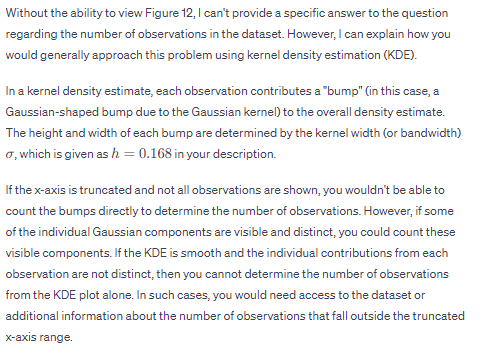

In [1]:
import numpy as np

# Given values
peak_density = 0.26  # p(xi) read from the figure
sigma = 0.168        # Kernel width, also the standard deviation for the Gaussian kernel
pi = np.pi           # Pi constant from numpy

# Calculate the number of observations N
N = 1 / (peak_density * np.sqrt(2 * pi) * sigma)
N


9.133293965234264